<a href="https://colab.research.google.com/github/electrodrago/image-thresholding/blob/main/Image_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lấy ngưỡng hình ảnh - Image Thresholding

Trong lĩnh vực xử lý ảnh, phân đoạn hình ảnh (Image Segmentation) là công đoạn chia nhỏ hình ảnh thành các khu vực (vùng) hoặc vật thể.

<img src="https://www.mvtec.com/fileadmin/Redaktion/mvtec.com/technologies/deep_learning/mvtec-deep-learning-segmentation-workflow.png">

Có rất nhiều cách để phân đoạn hình ảnh ở hiện tại:
- Xét ngưỡng (Thresholding)
- Gom cụm điểm ảnh (Clustering methods)
- Phân vùng đồ thị ảnh (Graph partitioning methods)
- Tích chập ảnh học sâu (CNN - UNet)
- ...

<img src="https://learnopencv.com/wp-content/uploads/2020/06/segmentation_methods-1.png">

## Ý tưởng của lấy ngưỡng hình ảnh

Cho một điểm ảnh có đầu vào tại vị trí (x, y) trong hệ 2 chiều. Sử dụng một hàm nhận vào hai giá trị x, y: **f(x, y)**, giá trị mới của điểm ảnh tại (x, y) như sau:

<img src="https://github.com/electrodrago/image-thresholding/blob/main/threshold-fomula.png?raw=true">



### Giá trị T

- Nếu trị T giữ nguyên là một hằng số trong trên toàn bộ bức ảnh, đây được gọi là ***Lấy ngưỡng toàn cục***.
- Nếu giá trị T thay đổi hoặc phụ thuộc vào một khu vực ảnh nhất định, đây được gọi là ***Lấy ngưỡng thích ứng***.

## Lấy ngưỡng toàn cục

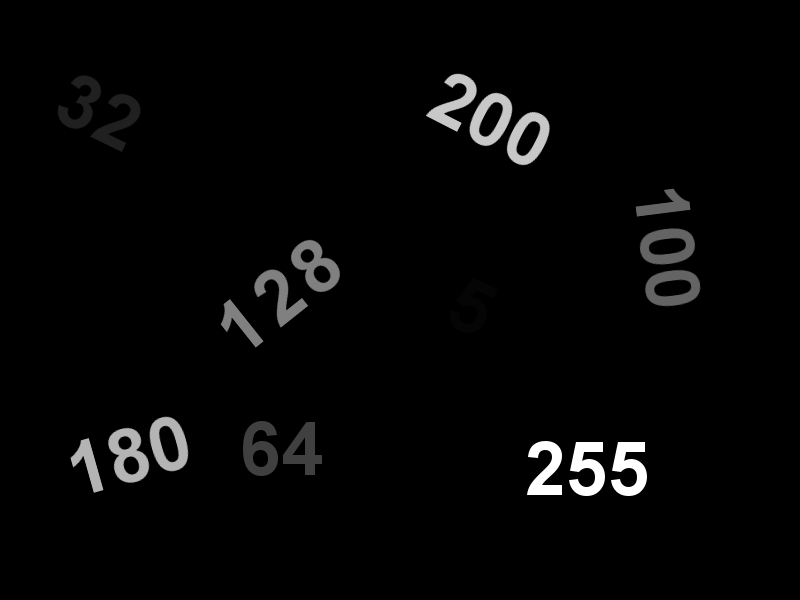

In [12]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import urllib.request
 
urllib.request.urlretrieve("https://github.com/spmallick/learnopencv/blob/master/Threshold/threshold.png?raw=true", "input.jpg")
input = cv2.imread("input.jpg")
input = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
cv2_imshow(input)

### Viết hàm lấy ngưỡng

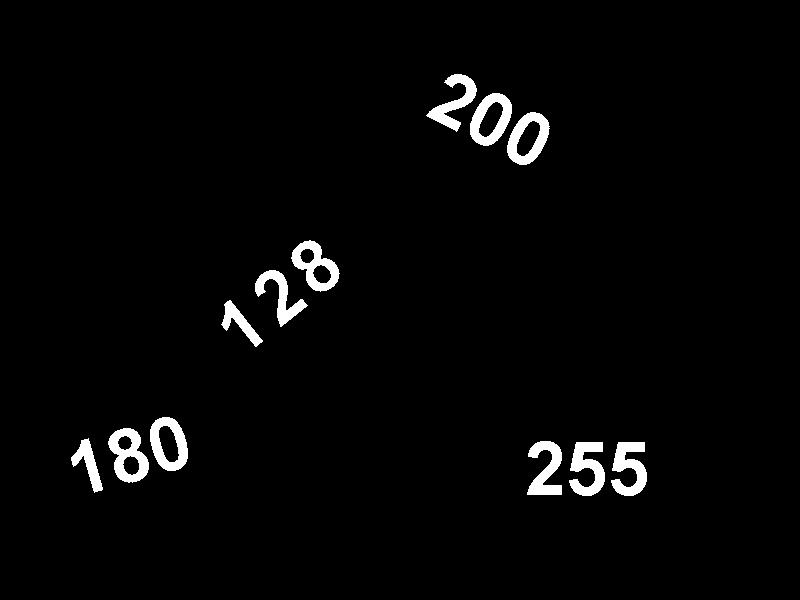

In [13]:
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img
  
global_threshold_img = global_threshold(input, 100, 255, 0)
cv2_imshow(global_threshold_img)

### Hàm được OpenCV định nghĩa

`cv2.threshold(src, thresh, maxval, type) → retval, dst`

Hàm trả về bức ảnh đã được lấy ngưỡng là `dst` và ngưỡng được áp dụng cho ảnh đầu vào `retval`.

- `src` là ảnh đầu vào
- `thresh` là giá trị ngưỡng toàn cục
- `maxval` là giá trị cao nhất để dùng với 2 loại `THRESH_BINARY` và `THRESH_BINARY_INV`.
- `type` là loại lấy ngưỡng được cv2 định nghĩa

Tham khảo:

 <img src="https://github.com/electrodrago/image-thresholding/blob/main/threshold-type.png?raw=true">

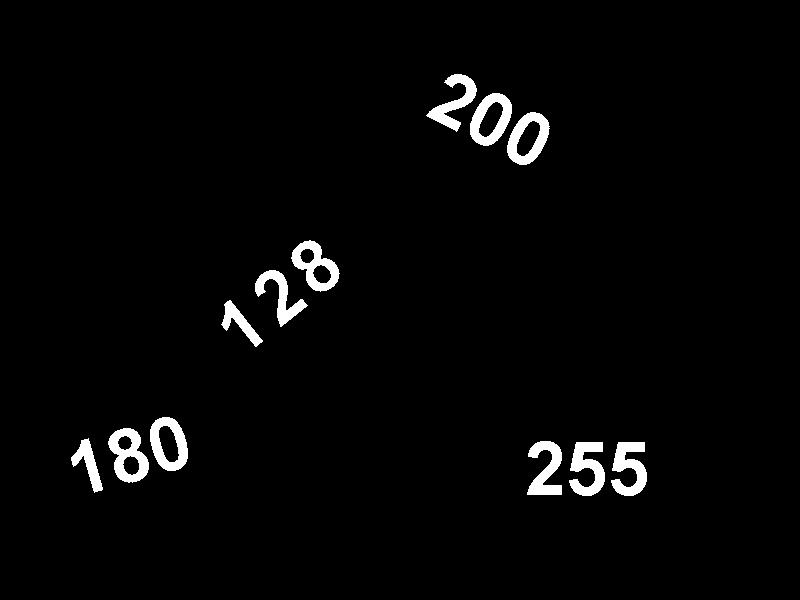

In [15]:
ret, thresh = cv2.threshold(input, 100, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

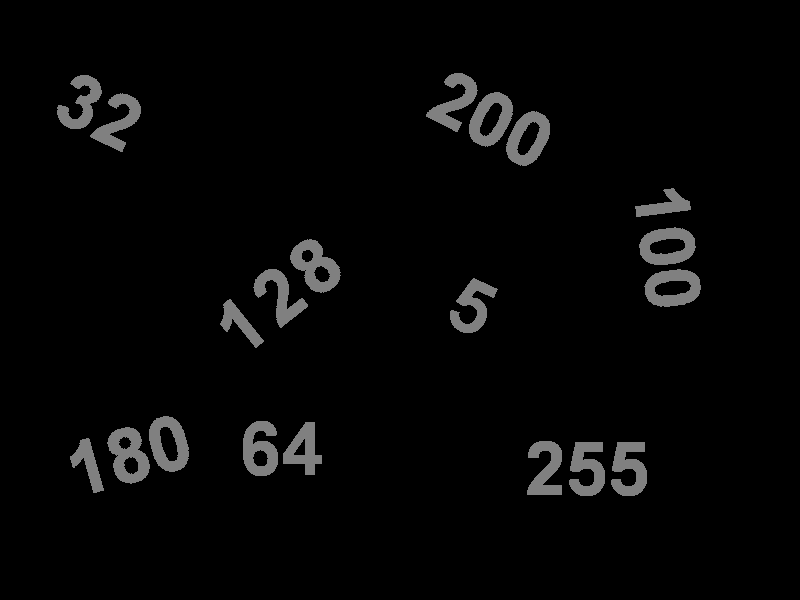

In [23]:
ret, thresh = cv2.threshold(input, 1, 128, cv2.THRESH_BINARY)
cv2_imshow(thresh)

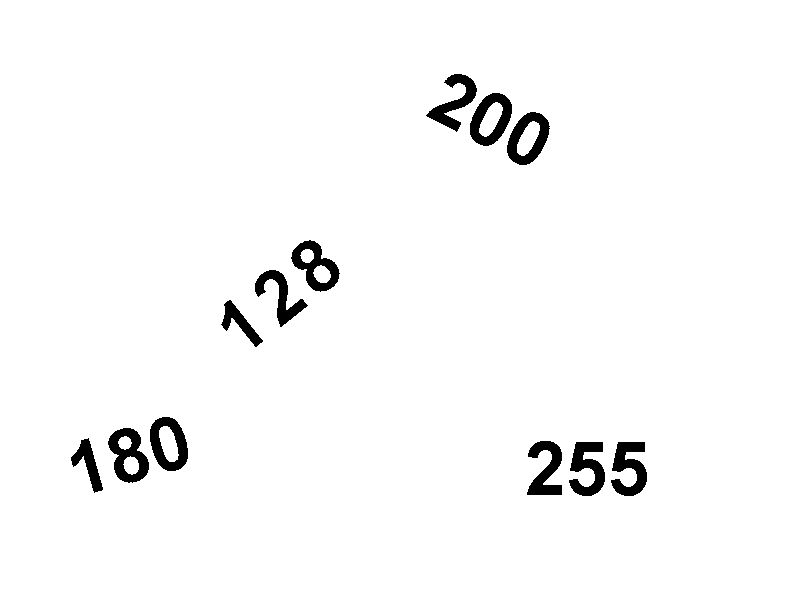

In [24]:
ret, thresh = cv2.threshold(input, 100, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

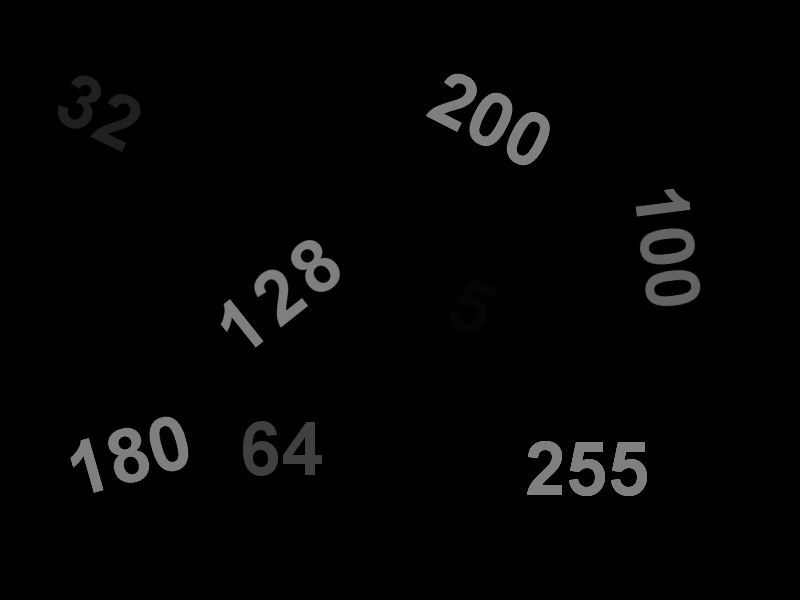

In [30]:
# All values above the threshold (127) are set to 127
# All values less than or equal to 127 are unchanged
# The  maxValue is ignored.
ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_TRUNC)
cv2_imshow(thresh)

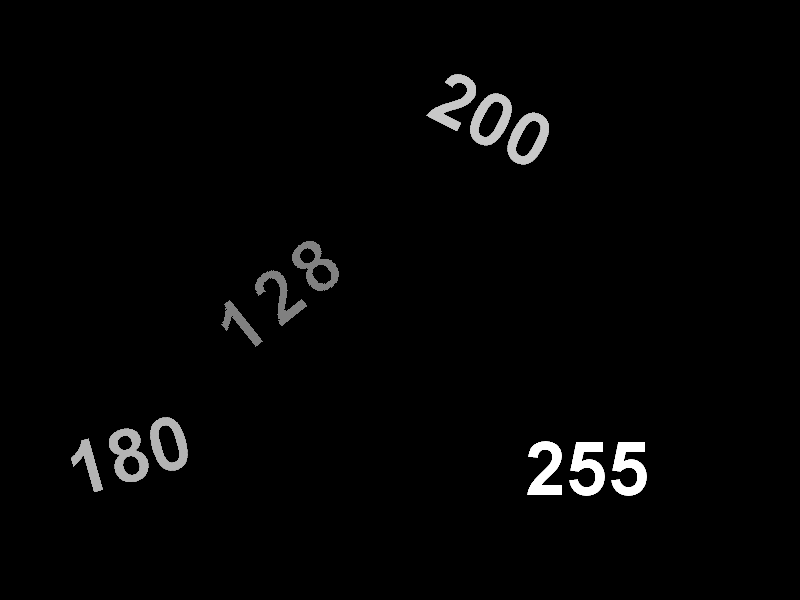

In [31]:
# The destination pixel value is set to the pixel value of the corresponding source, 
# if the source pixel value is greater than the threshold.
# Otherwise, it is set to zero
# The maxValue is ignored
ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_TOZERO)
cv2_imshow(thresh)

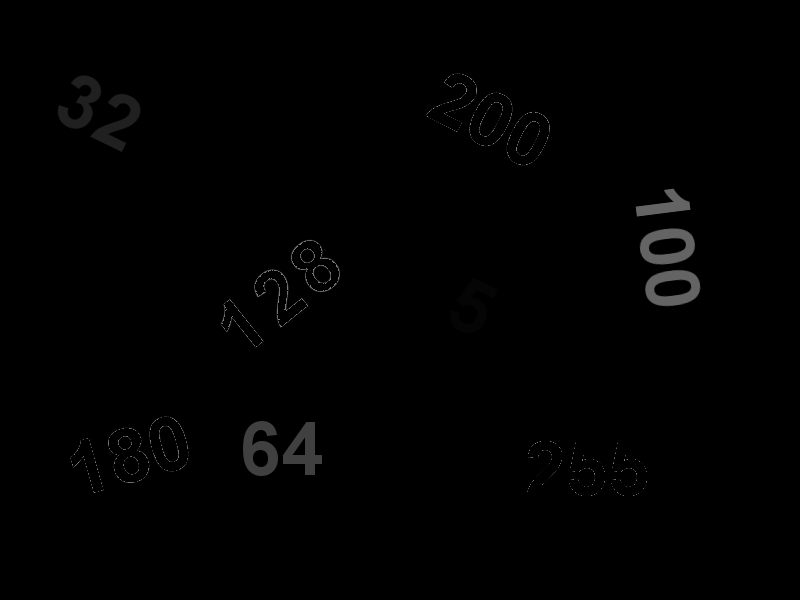

In [32]:
ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_TOZERO_INV)
cv2_imshow(thresh)

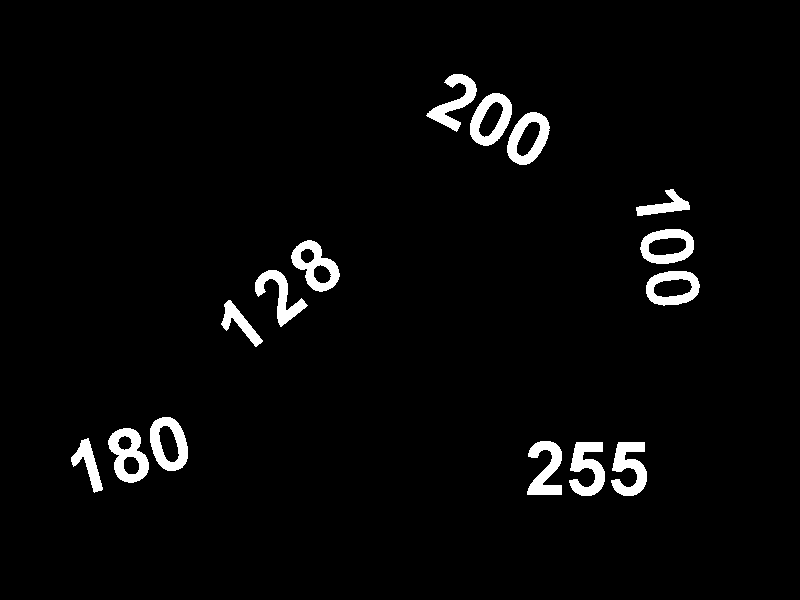

In [33]:
ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_OTSU)
cv2_imshow(thresh)

## Lấy ngưỡng thích ứng


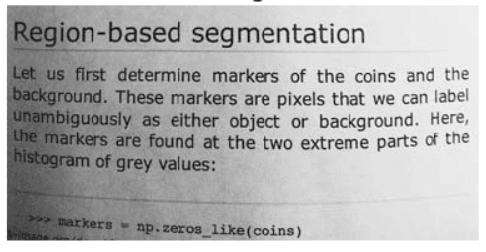

In [35]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import urllib.request
 
urllib.request.urlretrieve("https://github.com/electrodrago/image-thresholding/blob/main/adaptive.png?raw=true", "input2.jpg")
input = cv2.imread("input2.jpg")
input = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
cv2_imshow(input)

### Thử với phương pháp lấy ngưỡng toàn cục

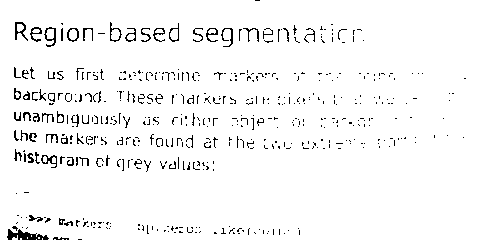

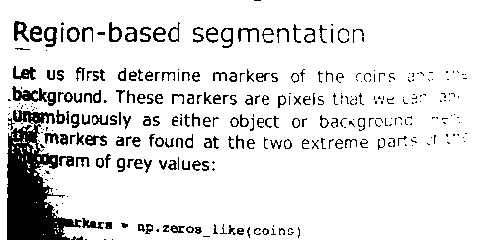

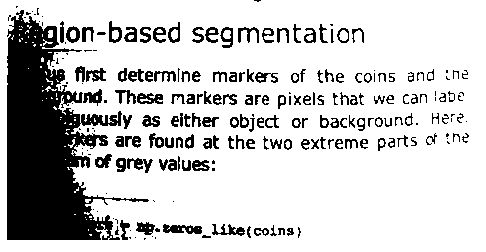

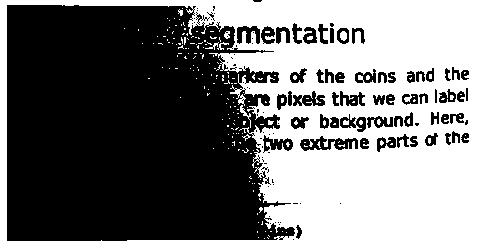

In [42]:
# 64 -> 96 -> 128 -> 192 -> 255
ret, thresh = cv2.threshold(input, 64, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
ret, thresh = cv2.threshold(input, 96, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
ret, thresh = cv2.threshold(input, 128, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
ret, thresh = cv2.threshold(input, 192, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

### Áp dụng phương pháp lấy ngưỡng thích ứng

Đây là phương pháp được áp dụng khi ảnh được chụp với độ sáng tối không đồng đều (non-uniform illumination).

`cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C) -> thresh`

- `src` là ảnh đầu vào
- `thresholdType` là loại threshold biểu diễn cách gán giá trị mới sau khi lọc ngưỡng, chọn 1 trong 2 loại: `THRESH_BINARY` hoặc `THRESH_BINARY_INV`.
- `adaptiveMethod` sử dụng 1 trong 2 loại: 
  + `cv2.ADAPTIVE_THRESH_MEAN_C`: sử dụng giá trị trung bình của khu vực liền kề
  + `cv2.ADAPTIVE_THRESH_GAUSIAN_C`: sử dụng giá trị theo phân phối chuẩn quanh giá trị trung bình và độ lệch chuẩn của khu vực liền kề
- `blockSize` là số đơn vị liền kề
- `C` là hằng số thường dùng để điều chỉnh giá trị trừ của threshold.

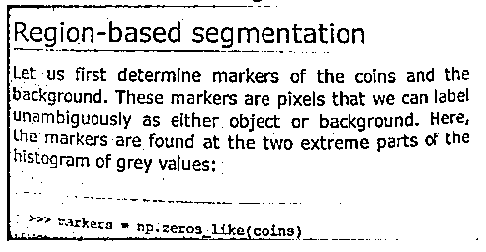

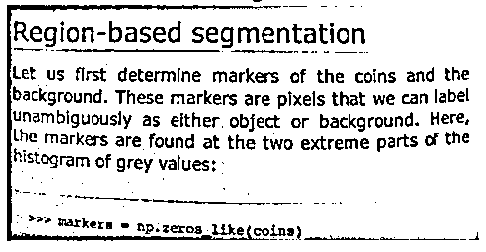

In [62]:
thresh = cv2.adaptiveThreshold(input, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 12)
cv2_imshow(thresh)
thresh = cv2.adaptiveThreshold(input, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 12)
cv2_imshow(thresh)

# Tài liệu tham khảo

[1] TheAILearner, *Image Thresholding*, Truy cập từ: https://theailearner.com/2019/07/16/image-thresholding/ vào 16/06/2022 lúc 08h40 sáng.

[2] MVTEC SOFTWARE GMBH, *SEMANTIC SEGMENTATION*, Truy cập từ: https://www.mvtec.com/technologies/deep-learning/deep-learning-methods/semantic-segmentation vào 16/06/2022 lúc 09h20 sáng.

[3] POOJA BAGAD, *Classification of Image Segmentation Techniques*, Truy cập từ: https://pooja-bagad18.medium.com/classification-of-image-segmentation-techniques-cc6a031b75fc vào 16/06/2022 lúc 09h22 sáng.

[4] LearnOpenCV, *Image Thresholding in OpenCV*, Truy cập từ: https://learnopencv.com/opencv-threshold-python-cpp/ vào 16/06/2022 lúc 09h55 sáng.